
# Support Vector Machines Project 

DATASET: https://www.muratkoklu.com/datasets/

Citation Request :
CINAR I., KOKLU M. and TASDEMIR S., (2020). Classification of Raisin Grains Using Machine Vision and Artificial Intelligence Methods, Gazi Journal of Engineering Sciences, vol. 6, no. 3, pp. 200-209, December, 2020, DOI: https://doi.org/10.30855/gmbd.2020.03.03

Article Download (PDF): https://dergipark.org.tr/tr/download/article-file/1227592

ABSTRACT: In this study, machine vision system was developed in order to distinguish between two different variety of raisins (Kecimen and Besni) grown in Turkey. Firstly, a total of 900 pieces raisin grains were obtained, from an equal number of both varieties. These images were subjected to various preprocessing steps and 7 morphological feature extraction operations were performed using image processing techniques. In addition, minimum, mean, maximum and standard deviation statistical information was calculated for each feature. The distributions of both raisin varieties on the features were examined and these distributions were shown on the graphs. Later, models were created using LR, MLP, and SVM machine learning techniques and performance measurements were performed. The classification achieved 85.22% with LR, 86.33% with MLP and 86.44% with the highest classification accuracy obtained in the study with SVM. Considering the number of data available, it is possible to say that the study was successful.

## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

## Get the Data
** Read the 'Raisin_Dataset' xlsx file into a dataframe **

In [2]:
df = pd.read_excel('Raisin_Dataset.xlsx')

**Check the dataframe.**

In [3]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


## Data Preperation

<AxesSubplot:>

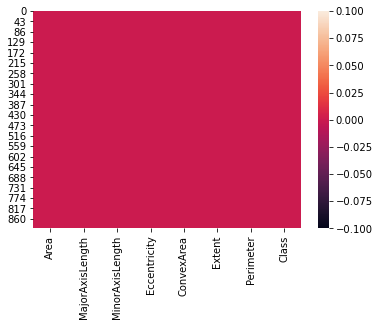

In [6]:
sns.heatmap(df.isnull())

## There is no missing data 

## Exploratory Data Analysis

Let's visualize the data 

C:\Users\Abdelrahman\anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='MajorAxisLength', ylabel='MinorAxisLength'>

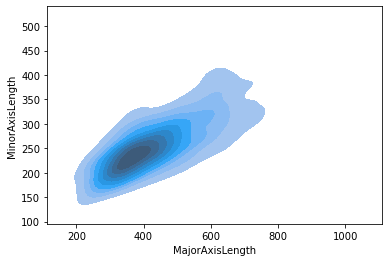

In [7]:
sns.kdeplot(x='MajorAxisLength' , y='MinorAxisLength',data =df,shade=True,shade_lowest=False)

<AxesSubplot:xlabel='Area', ylabel='Density'>

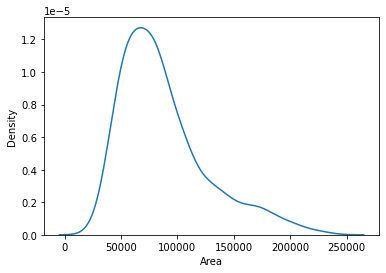

In [8]:
sns.kdeplot(x='Area',data=df)

## From describe the data we see the data need to Scaling

# Standardize the Variables

Time to standardize the variables.


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(df.drop('Class',axis=1))

StandardScaler()

In [12]:
scaled_features = scaler.transform(df.drop('Class',axis=1))

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = scaled_features
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train a Model

Now its time to train a Support Vector Machine Classifier. 


In [15]:
from sklearn.svm import SVC

In [16]:
svc = SVC()

In [17]:
svc.fit(X_train,y_train)

SVC()

## Model Evaluation

**Now get predictions from the model and create a confusion matrix and a classification report.**

In [18]:
prediction = svc.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report

In [20]:
print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

       Besni       0.91      0.81      0.86       136
     Kecimen       0.83      0.92      0.87       134

    accuracy                           0.86       270
   macro avg       0.87      0.86      0.86       270
weighted avg       0.87      0.86      0.86       270



[[110  26]
 [ 11 123]]


## Gridsearch Practice

We use Grid_search to check if the model can get high accuracy or not 

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid = {'C':[0.1 , 1 , 10 , 100 , 1000], 'gamma':[1 , 0.1 , 0.01 , 0.001 , 0.0001]}

In [23]:
grid = GridSearchCV(SVC(), param_grid,verbose=3)

In [24]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.825, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.897, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.865, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.841, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.786, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.873, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................. C=0.1, gamma=0.0001, score=0.500, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.500, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.643, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.881, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.905, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.873, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.841, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[CV] ................... C=100, gamma=0.01, score=0.810, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .................. C=100, gamma=0.001, score=0.865, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .................. C=100, gamma=0.001, score=0.905, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .................. C=100, gamma=0.001, score=0.873, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .................. C=100, gamma=0.001, score=0.841, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .................. C=100, gamma=0.001, score=0.841, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] ................. C=100, gamma=0.0001, score=0.881, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.2s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [25]:
pre = grid.predict(X_test)

In [26]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [27]:
grid.best_params_

{'C': 1000, 'gamma': 0.001}

In [28]:
print(classification_report(y_test,pre))
print('\n')
print(confusion_matrix(y_test,pre))

              precision    recall  f1-score   support

       Besni       0.89      0.86      0.87       136
     Kecimen       0.86      0.89      0.88       134

    accuracy                           0.87       270
   macro avg       0.87      0.87      0.87       270
weighted avg       0.87      0.87      0.87       270



[[117  19]
 [ 15 119]]


# Thank you